In [1]:
import tensorflow_datasets as tfds
pd = tfds.core.lazy_imports.pandas

/mnt/vlm-pd/miniconda3/envs/vlm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Metadata dataframe

In [2]:
metadata_path = "gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets/downloads/manual_cc12m/00003.parquet"
metadata_df = pd.read_parquet(metadata_path)
(metadata_df['status'] == 'success').sum(), len(metadata_df)

(4416, 10000)

In [3]:
metadata_df.head()

,caption,url,key,status,error_message,width,height,original_width,original_height,exif,md5
0,London Calling - The Clash tattoo,http://static.ratemyink.com/images/ul/383/Lond...,000030005,success,None,256.0,256.0,600.0,450.0,"{""Image ImageDescription"": """", ""Image Make"": ""...",6607e945c70846bc9815558631ddcabe
1,Kidneys human organ graphic icon. Kidneys sign...,https://us.123rf.com/450wm/archivector/archive...,000030004,success,None,256.0,256.0,450.0,450.0,{},446163e0fe26a6518189d6748830fc29
2,<PERSON> pop art vector illustration. Vector i...,https://thumbs.dreamstime.com/b/afraid-girl-po...,000030001,success,None,256.0,256.0,800.0,800.0,{},1f84e41f21161c0af6629b9e78d18ed2
3,Superb Retro Style Film Stripes. An amazing 3d...,https://thumbs.dreamstime.com/b/amazing-d-illu...,000030000,success,None,256.0,256.0,800.0,450.0,{},50bc09422170ab7a662143340798373b
4,The Mill City Museum was built into the ruins ...,http://freepages.rootsweb.com/~schuckwj/family...,000030025,success,None,256.0,256.0,1175.0,881.0,"{""Image ImageWidth"": ""1175"", ""Image ImageLengt...",badc59b4fcf44ceae7c2e0ed210a7e94


# Dataset

In [6]:
version = "1.0.1"
dataset = tfds.load(f"cc12m:{version}",data_dir="gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets",)['train']
dataset

<_PrefetchDataset element_spec={'caption': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'original_height': TensorSpec(shape=(), dtype=tf.int64, name=None), 'original_width': TensorSpec(shape=(), dtype=tf.int64, name=None), 'url': TensorSpec(shape=(), dtype=tf.string, name=None)}>

2024-06-24 17:41:21.181903: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


tf.Tensor(b'<PERSON> Photo - <PERSON> at the Los Angeles Premiere of Iron Man Manns Grauman Chinese Theatre Hollywood CA 04-30-08', shape=(), dtype=string)
tf.Tensor(b'https://static3.imagecollect.com/preview/137/2e7d0567688d0c2', shape=(), dtype=string)
tf.Tensor(b'Map of Gosforth High Street showing the traffic-free area and route of the Remembrance Sunday parade.', shape=(), dtype=string)
tf.Tensor(b'http://spaceforgosforth.com/wp-content/uploads/2019/11/RemembranceMap.jpg', shape=(), dtype=string)


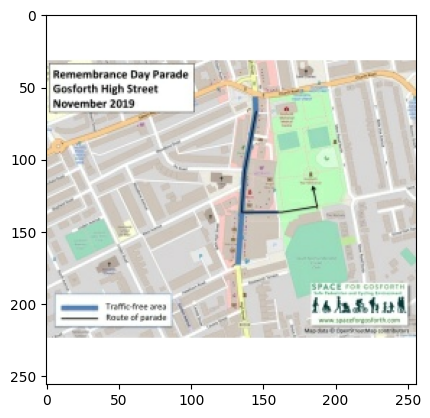

In [7]:
import matplotlib.pyplot as plt
iterator = iter(dataset)
for i in range(2):
    batch = next(iterator)
    plt.imshow(batch['image'])
    print(batch['caption'])
    print(batch['url'])

# Inspect cc12m.tsv

In [ ]:
path = "~/austin_big_vision/big_vision/datasets/cc12m/cc12m.tsv"
df = pd.read_csv(path, sep="\t")
df.head()

,url,caption
0,https://chairish-prod.freetls.fastly.net/image...,Metal Design Within Reach Ivory Slipper Chairs...
1,https://www.abc.net.au/news/image/9329676-3x2-...,Two syringes and a small vial of vaccine.
2,https://i.pinimg.com/originals/18/34/e4/1834e4...,The source of Anime quotes & Manga quotes : Ph...
3,https://medialibrarycdn.entrata.com/media_libr...,Image of Stained Concrete Flooring Throughout ...
4,https://solarpoweredblonde.com/wp-content/uplo...,Drone shot of Green Bowl beach and two people ...
